Sophia Barnhart

Assignment \#3: Linear State Space Models
=========================================

Please answer all three questions below within a Jupyter notebook.

**Due: 03rd March, 2016**

Submission of the assignment is due before 9:30am to econ370nyu@gmail.com. 

Please use the following standard for the subject email title ``assignment#3-<lastname>-<id>``.


# Question 1

Consider the following ARMA(2,1) process

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t+\theta w_{t-1}$$

(1) Write down the linear state space system to represent the equations above

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
        w_t
    \end{bmatrix}
    = \begin{bmatrix}
              \phi_1 & \phi_2 & \theta \\
              1 & 0 & 0  \\
              0 & 0 & 0
        \end{bmatrix}
        \begin{bmatrix}
        y_{t-1} \\
        y_{t-2} \\
        w_{t-1}
    \end{bmatrix}
    + \begin{bmatrix}
        1 \\
        0 \\
        1
        \end{bmatrix}
        w_t
    \qquad
$$

(2) Assume that $\phi_1= 1.8$, $\phi_2=-0.81$, $\theta=0.5$, and $w_t\sim \mathcal N(0,1)$. Plot the impulse reponse graph for this system. (Hint: assume $w_t=0$ for $t\leq 0$, and assume $w_t=1$ for $t=1$.)


$$
    y_{t+1} =\phi_0+  \phi_1 y_t + \phi_2 y_{t-1}+w_t
    \quad \text{s.t.} \quad
    y_0, y_{-1} \text{ given}
$$

To map  into our state space system, we set

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
        w_t
    \end{bmatrix}
    \qquad
    A = \begin{bmatrix}
              \phi_1 & \phi_2 & \theta  \\
              1 & 0 & 0 \\
              0 & 0 & 0
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        0 \\
        1
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$$

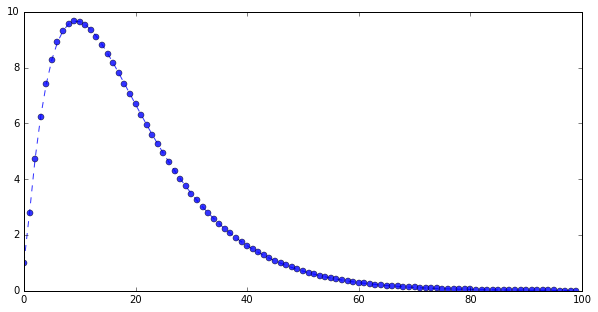

In [53]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
# N: number of periods for the transition
# std: st.d of innovation

N = 100
std = 1.0
phi_1 = 1.8
phi_2 = -0.81
theta = 0.5

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C = np.array(([1,0,1])) 
G = np.array(([1,0,0])) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std
#Simul_shock = np.random.normal(0, std, N) # Generate a random shock for simulation
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([1,0,0])
Simul_y = np.zeros(N)
 
# = Generate Data = #
for i in range(0,N):
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
    Simul_y[i] = np.dot(G, Simul_x[i,:])
     
        
# = Plot the simulation = #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()   

(3) Simulate the economy for 1000 periods, and plot the simulated path for $y_t$. You can choose the starting value of $y_t$ as you like.

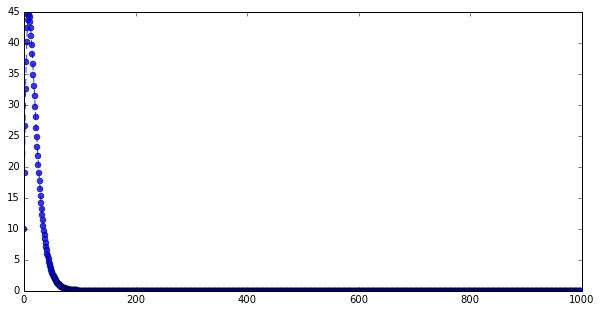

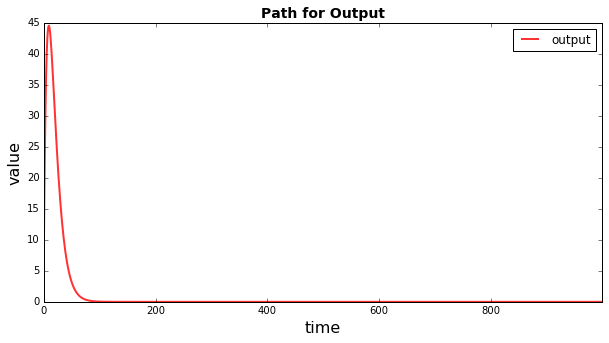

In [59]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
# N: number of periods for the transition
# std: st.d of innovation

N = 1000
std = 1.0
phi_1 = 1.8
phi_2 = -0.81
theta = 0.5


A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C = np.array(([1,0,1])) 
G = np.array(([1,0,0])) 
  
y_t = 10 #chose starting point

    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std
#Simul_shock = np.random.normal(0, std, N) # Generate a random shock for simulation
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([y_t,0,0]) #choose y_t
Simul_y = np.zeros(N)

    
# = Generate Data = #
for i in range(0,N):
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
    Simul_y[i] = np.dot(G, Simul_x[i,:])
     
        
# = Plot the simulation = #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()   

# = path for output = #  
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(Simul_y, 'r-', lw=2, alpha=0.8, label=r'output')   
ax.legend(ncol=1)
plt.title(r"Path for Output", fontsize=14, fontweight='bold')

(4) Change the parameters to be the following: $\phi_1=-1.2$, $\phi_2=-0.36$, $\theta=0.0$, and $w_t\sim \mathcal N(0,1)$.  Plot the impulse reponse graph for this system. Is this a mean-reverting process?

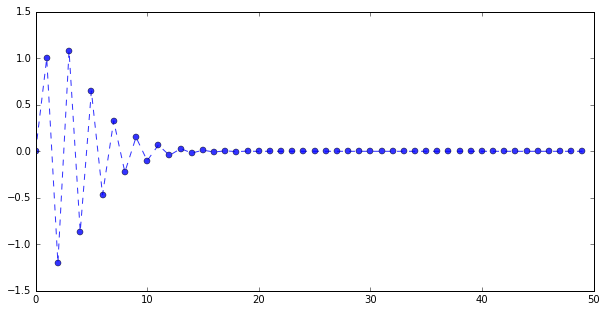

In [60]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
# N: number of periods for the transition
# std: st.d of innovation

N = 50
std = 1.0
phi_1 = -1.2
phi_2 = -0.36
theta = 0.0


A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C = np.array(([1,0,1])) 
G = np.array(([1,0,0])) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std
#Simul_shock = np.random.normal(0, std, N) # Generate a random shock for simulation
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0])
Simul_y = np.zeros(N)
 
# = Generate Data = #
for i in range(0,N):
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
    Simul_y[i] = np.dot(G, Simul_x[i,:])
           
# = Plot the simulation = #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()   

Yes, this is a mean-reverting process (the process converges to mean of 0).

# Question 2

Consider the following AR(2) process 

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t$$

 

(1) Write down the linear state space system to represent the equations above

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
    \end{bmatrix}
    = \begin{bmatrix}
              \phi_1 & \phi_2 \\
              1 & 0
        \end{bmatrix}
        \begin{bmatrix}
        y_{t-1} \\
        y_{t-2}
    \end{bmatrix}
    + \begin{bmatrix}
        1 \\
        0
        \end{bmatrix}
        w_t
    \qquad
$$

(2) State the condition on $\phi_1$ and $\phi_2$ for co-variance stationary. 


A  process $\{x_t\}$ is said to be covariance stationary if

#### $\mu_t$ and $\Sigma_t$ are constant in $t$

#### $\Sigma_{t+j,t}$ depends on the time gap $j$ but not on time $t$



(3) Assume $\phi_1= 1.6$, $\phi_2=-0.64$. Start from $y_{-1}=0$ and $y_{-2}=0$, simulate the system for $N=200$ periods and repeat it for $S=500$ times. Plot the sample distribution of $y_t$ at $t=10$, $t=100$ and $t=150$. 


To map  into our state space system, we set

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} 
    \end{bmatrix}
    \qquad
    A = \begin{bmatrix}
              \phi_1 & \phi_2 \\
              1 & 0
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        0
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 1 & 0 \end{bmatrix}
$$

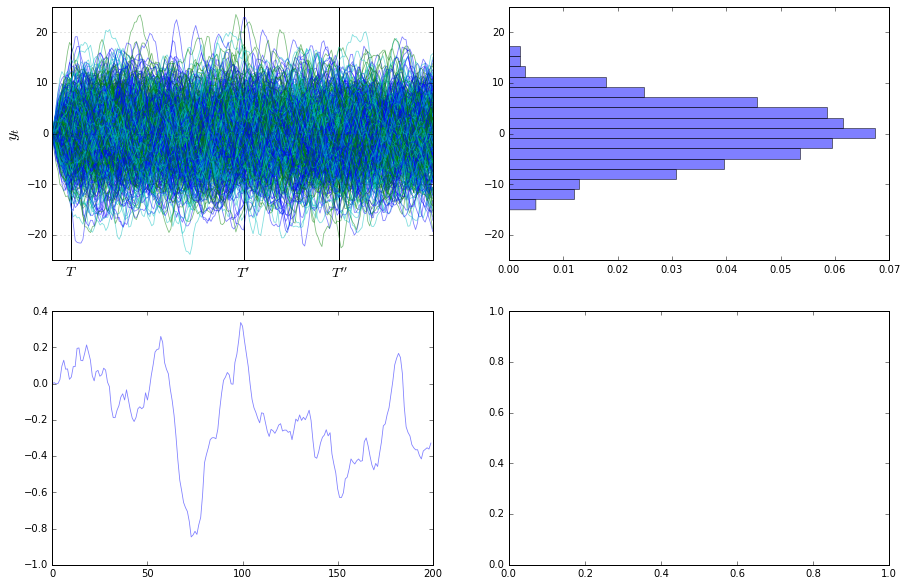

In [75]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
# N: number of periods for the transition
# std: st.d of innovation

N = 200
S = 500
std = 1.0
phi_1 = 1.6
phi_2 = -0.64

A = np.array(([phi_1,phi_2],[1,0]))    
C = np.array(([1,0])) 
C_matrix = np.array(([1,0], [0,0])) 
G = np.array(([1,0])) 
    
# == set up the simulation == #

mu_0 = np.array([1,0])
Sigma_0 = np.zeros((2,2))

ymin, ymax = -25, 25

T0 = 10
T1 = 100
T2 = 150

# = Generate Plots = #

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes[0,0]
ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), ymin, ymax)
ax.set_xticks((T0, T1, T2))
ax.set_xticklabels((r"$T$", r"$T'$", r"$T''$"), fontsize=14)

# = Generate Data and plot = #

sample=[]
mean_y=np.zeros(N)
var_y=np.zeros(N)
for j in range(S):
    Simul_shock = np.random.normal(0, std, N)
    Simul_x = np.zeros((N+1,2))
    Simul_x[0,:]=np.array([0,0])
    Simul_y = np.zeros(N)
    for i in range(0,N):
        Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
        Simul_y[i] = np.dot(G, Simul_x[i,:])
        mean_y[i]=mean_y[i]+Simul_y[i]/S
    sample.append(Simul_y[T0])
    rcolor = random.choice(('c', 'g', 'b'))
    ax.plot(Simul_y, color=rcolor, lw=0.8, alpha=0.5)

axes[0,1].set_ylim(ymin, ymax)
axes[0,1].hist(sample, bins=16, normed=True, orientation='horizontal', alpha=0.5)  
axes[1,0].plot(mean_y, 'b-', lw=0.8, alpha=0.5)
plt.show()

# = Use function to compute the unconditional moments = #

#mu_y,Sigma_y,mu_x,Sigma_x = unconditional_moments(A, C_matrix, G, mu_0, Sigma_0, T0)

(4) Use the same parameter as in part (3). Plot the stationary distribution of $y_t$ (Set $N=1000$ and plot the sample distribution of $y_t$ at $t=800$).

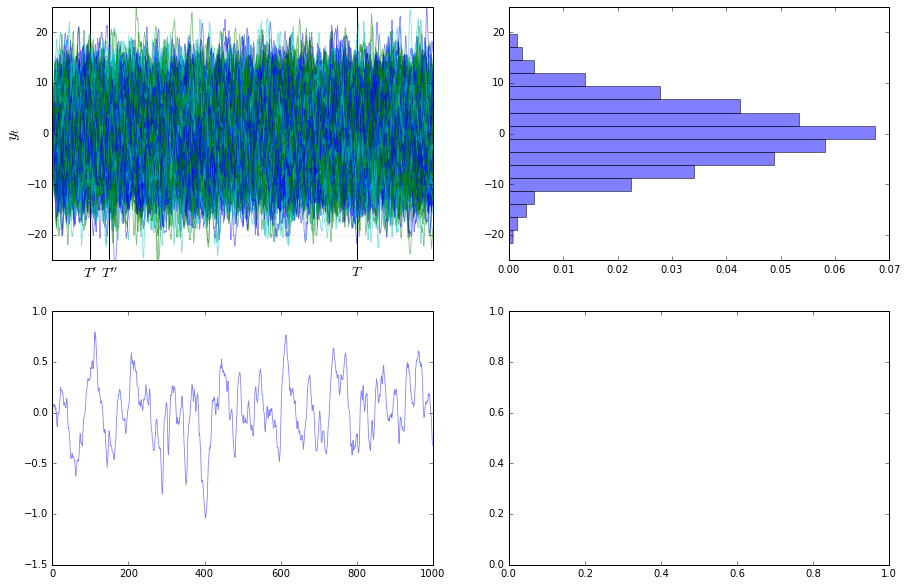

In [80]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
# N: number of periods for the transition
# std: st.d of innovation

N = 1000
S = 500
std = 1.0
phi_1 = 1.6
phi_2 = -0.64

A = np.array(([phi_1,phi_2],[1,0]))    
C = np.array(([1,0])) 
C_matrix = np.array(([1,0], [0,0])) 
G = np.array(([1,0])) 
    
# == set up the simulation == #

mu_0 = np.array([1,0])
Sigma_0 = np.zeros((2,2))

ymin, ymax = -25, 25

T0 = 800

# = Generate Plots = #

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes[0,0]
ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), ymin, ymax)
ax.set_xticks((T0, T1, T2))
ax.set_xticklabels((r"$T$", r"$T'$", r"$T''$"), fontsize=14)

# = Generate Data and plot = #

sample=[]
mean_y=np.zeros(N)
var_y=np.zeros(N)
for j in range(S):
    Simul_shock = np.random.normal(0, std, N)
    Simul_x = np.zeros((N+1,2))
    Simul_x[0,:]=np.array([0,0])
    Simul_y = np.zeros(N)
    for i in range(0,N):
        Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
        Simul_y[i] = np.dot(G, Simul_x[i,:])
        mean_y[i]=mean_y[i]+Simul_y[i]/S
    sample.append(Simul_y[T0])
    rcolor = random.choice(('c', 'g', 'b'))
    ax.plot(Simul_y, color=rcolor, lw=0.8, alpha=0.5)

axes[0,1].set_ylim(ymin, ymax)
axes[0,1].hist(sample, bins=16, normed=True, orientation='horizontal', alpha=0.5)  
axes[1,0].plot(mean_y, 'b-', lw=0.8, alpha=0.5)
plt.show()

# = Use function to compute the unconditional moments = #

#mu_y,Sigma_y,mu_x,Sigma_x = unconditional_moments(A, C_matrix, G, mu_0, Sigma_0, T0)

# Question 3



Consider the Solow growth model discussed in the class:

Production function: 

$$y_t= \exp(z_t) k_t^\alpha$$

Technology: 
    
$$z_t =\rho z_{t-1}+w_t$$    

Saving rate: $$s$$

Consumption: 

$$c_t=(1-s)y_t=(1-s)\exp(z_t) k_t^\alpha$$

Law of motion for capital: 

$$k_{t+1}=(1-\delta)k_t+s y_t=(1-\delta)k_t+s \exp(z_t) k_t^\alpha$$

(1) Log-linearize the  model around the steady state. Write down the log-linearized version of the production function and the law of motion of capital. 

Production function:
$$y_t= \exp(z_t) k_t^\alpha$$

$$y \exp (\widehat y_t)=\exp(z_t)\left[k\exp (\widehat k_t)\right]^\alpha$$
$$=\exp(z_t)k^\alpha\exp(\alpha\widehat k_t)$$

In the steady state, 
$$ y=k^\alpha$$

$$y \exp (\widehat y_t)=\exp(z_t)y\exp(\alpha\widehat k_t)$$

$$\exp (\widehat y_t)=\exp(z_t)\exp(\alpha\widehat k_t) $$
$$=\exp(z_t+\alpha\widehat k_t) $$

Log-linearized production function:
$$ \widehat y_t = z_t+\alpha \widehat k_t$$


Law of motion of capital:
$$k_{t+1}=(1-\delta)k_t+s y_t$$
$$=(1-\delta)k_t+s \exp(z_t) k_t^\alpha$$

$$k \exp (\widehat k_{t+1})=(1-\delta)k \exp (\widehat k_t)+s y \exp (\widehat y_t)$$

Using the approximation,

$$k [1+\widehat k_{t+1}]=(1-\delta)k [1+\widehat k_{t}]+s y [1+\widehat y_{t}]$$

$$k  \widehat k_{t+1} =(1-\delta)k \widehat k_{t}]+s y \widehat y_{t} $$

$$   \widehat k_{t+1} =(1-\delta)  \widehat k_{t} +s \frac{y}{k} \widehat y_{t} $$

In the steady state,

$$k_{t+1}=k$$

$$k=(1-\delta)k+s y$$
$$\delta k=s y$$
$$s\frac{y}{k}=\delta$$

\begin{align}
\widehat k_{t+1} &=(1-\delta)  \widehat k_{t} +\delta \widehat y_{t} \\
&= (1-\delta)  \widehat k_{t} +\delta \widehat y_{t} \\
&= (1-\delta)  \widehat k_{t} +\delta (z_t+\alpha \widehat k_t)\\
\end{align}

Log-linearized law of motion of capital:
$$\widehat k_{t+1}=(1-\delta+\alpha \delta)  \widehat k_{t} +\delta  z_t$$


(2) Use the lag opperator, express the log-deviation of output and capital as ARMA processes of the shock $w_t$.

Lag operator

$$Ly_t=y_{t-1}$$
$$L^n y_t=y_{t-n}$$

$$ \frac{1}{1-\rho L}=1+\rho L+\rho^2 L^2+\rho^3 L^3+\ldots$$

AR(1) process with operator

$$z_t=\rho z_{t-1}+w_t=\rho L z_t+w_t$$

$$z_t=\frac{1}{1-\rho L}w_t$$

Using the operator

\begin{align}
\widehat k_{t+1} &=  \frac{\delta}{1-(1-\delta+\alpha \delta) L} z_t \\
&=  \frac{\delta}{(1-(1-\delta+\alpha \delta) L)(1-\rho L)} w_t \\
&\\
\widehat y_t  &= z_t+\alpha k_t\\
&=\frac{1}{1-\rho L} w_t + \frac{\alpha \delta}{(1-(1-\delta+\alpha \delta) L)(1-\rho L)} w_t  \\
&=  \frac{1+\alpha\delta-(1-\delta+\alpha \delta) L}{(1-(1-\delta+\alpha \delta) L)(1-\rho L)} w_t 
\end{align}

capital \{$\widehat k_{t+1}$\} follows an AR(2) process

\begin{equation}
\widehat k_{t+1}=\phi_1 \widehat k_{t}+\phi_2 \widehat k_{t-2}+\delta w_t
\end{equation}

where

\begin{align}
\phi_1&=(1-\delta+\alpha \delta)+\rho\\
\phi_2&=-(1-\delta+\alpha \delta)\rho
\end{align}

output $y_t$ follows an ARMA(2,1) process

\begin{equation}
\widehat y_{t}=\phi_1 \widehat y_{t-1}+\phi_2 \widehat y_{t-1}+(1+\alpha\delta)w_t+\theta w_{t-1}
\end{equation}

where

$$\theta=-(1-\delta+\alpha \delta)$$

(3) Use the following parameter: $\alpha=0.36$, $\rho=0.95$, $s=0.4$, $\delta=0.1$, and assume $w_t\sim \mathcal N(0,1)$. Simulate the log-deviation of output and capital for 200 periods. Plot the simulated paths of capital and output on the same graph.

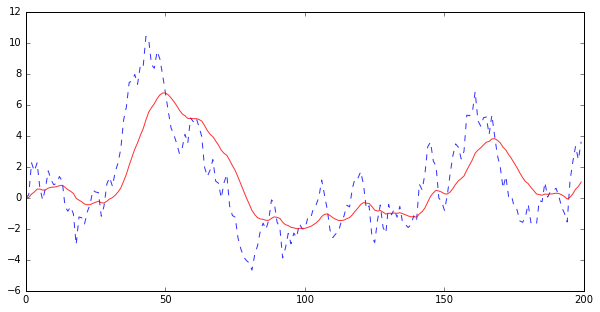

In [79]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Define Parameters for the Model == #
 
# N: number of periods for the transition
# std: st.d of innovation
 
N = 200
std = 1.0
alpha = 0.36
rho = 0.95
s = 0.4
delta = 0.1


phi_1 = (1-delta+alpha*delta)+rho
phi_2 = -(1-delta+alpha*delta)*rho
theta = -(1-delta+alpha*delta)

A_k = np.array(([phi_1,phi_2],[1,0]))    
C_k = np.array(([delta,0])) 
G_k = np.array(([1,0])) 

A_y = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C_y = np.array(([1+alpha*delta,0,1])) 
G_y = np.array(([1,0,0])) 
    
# == set up the simulation == #

#Simul_shock = np.zeros(N)
#Simul_shock[1]=std
Simul_shock = np.random.normal(0, std, N) # Generate random shock for simulation

Simul_kx = np.zeros((N+1,2))
Simul_kx[0,:]=np.array([0,0])
 

Simul_yx = np.zeros((N+1,3))
Simul_yx[0,:]=np.array([0,0,0])
 

Simul_y = np.zeros(N)
Simul_k = np.zeros(N)
 
for i in range(1,N):    
    Simul_kx[i,:] = np.dot(A_k, Simul_kx[i-1,:])+np.dot(C_k, Simul_shock[i])
    Simul_k[i] = np.dot(G_k, Simul_kx[i,:])
    
    Simul_yx[i,:] = np.dot(A_y, Simul_yx[i-1,:])+np.dot(C_y, Simul_shock[i])
    Simul_y[i] = np.dot(G_y, Simul_yx[i,:])    
     
# == Plot the simulation == #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'b--', Simul_k, 'r-', alpha=0.8) 
plt.show()    

# Question 4



Consider the following AR(1) process for the state variable $x_t$

$$ x_{t+1}=\rho x_{t}+ w_{t+1}$$
 
where $\rho\in(0,1)$ and $w_t\sim \mathcal N(0,1)$. 

(1) Write down the conditional forecast formula for $x_{t+j}$  conditional on observing $x_t$, i.e., what is $\mathbb E [x_{t+j}| x_t]$? (This is an analytical question.)

\begin{align}
E [x_{t+1}|x_t] &=  E [\rho x_t + cw_{t+1}] \\
&= E [\rho x_t|x_t] + E [cw_{t+1}|x_t]  \\
&= \rho x_t + E [cw_{t+1}] \\
&= \rho x_t \\
&\\
E [x_{t+2}|x_t] &=  E [\rho x_{t+1} + cw_{t+2}|x_t] \\
&= E [\rho x_{t+1}|x_t] \\
&= \rho E [x_{t+1}|x_t] \\
&= \rho^2 x_t \\
\end{align}

Therefore,
$$E [x_{t+j}|x_t] = \rho^j x_t$$

(2) Write down the forecast formula of the geometric forecast sum of $x_t$, i.e., what is $\sum_{j=0}^\infty \beta^j \mathbb E  [x_{t+j}| x_t]$? (This is an analytical question.)

$$E [x_t|x_t] + \beta E [x_{t+1}|x_t] + \beta^2 E [x_{t+2}|x_t] + \beta^3 E [x_{t+3}|x_t] + ...$$

\begin{align}
&= x_t + \beta Ax_t + \beta^2 A^2 x_t + \beta^3 A^3 x_t + ... \\
&= x_t [I + \beta A + \beta^2 A^2 + \beta^3 A^3 + ...] \\
&= x_t [I- \beta A]^{-1} \\
\end{align}

All eigenvalues of A have an absolute value of less than 1/$\beta$

Now assume the system is the following ARMA(2,1) process

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t+\theta w_{t-1}$$

(3) Write down the linear state space system for this process. Assume that $\phi_1=1.8$, $\phi_2=-0.81$, $\theta=0.5$, and $w_t\sim \mathcal N(0,1)$. Given $x_t=[1,1,1]$, plot $\mathbb E [x_{t+j}| x_t]$ for $j=0$ to $j=100$.  

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
        w_t
    \end{bmatrix}
    = \begin{bmatrix}
              \phi_1 & \phi_2 & \theta \\
              1 & 0 & 0  \\
              0 & 0 & 0
        \end{bmatrix}
        \begin{bmatrix}
        y_{t-1} \\
        y_{t-2} \\
        w_{t-1}
    \end{bmatrix}
    + \begin{bmatrix}
        1 \\
        0 \\
        1
        \end{bmatrix}
        w_t
    \qquad
$$

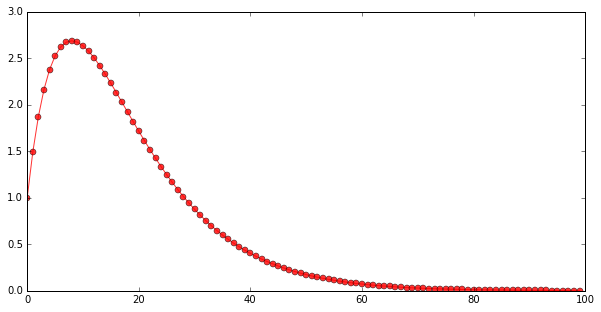

In [81]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Define Parameters for the Model == #
 
# N: number of periods for the transition
# std: st.d of innovation
 
N = 100
std = 1.0
phi_1 = 1.8
phi_2 = -0.81
theta = 0.5

A_y = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C_y = np.array(([1,0,1])) 
G_y = np.array(([1,0,0])) 
    
# == set up the forecast == #

Initial_yx = np.array(([1,1,1])) 

Forecast_y = np.zeros(N)

Forecast_y[0] = np.dot(G_y, Initial_yx)

Matrix_Ay = np.identity(3)
    
for i in range(1,N):    
    
    Matrix_Ay = np.dot(A_y, Matrix_Ay)
    
    Forecast_y[i] = np.dot(G_y, np.dot(Matrix_Ay, Initial_yx))  
     
# == Plot the simulation == #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Forecast_y, 'ro-', alpha=0.8) 
plt.show()  